# WeatherPy

In [1]:
# Dependencies
import json
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Setup API Key
from config import api_key

# Import citipy to generate cities
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List
- Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create random set of latitiudes and longitudes and put them in coord[]
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

## Perform API Calls
- Perform a weather check on each of the cities using a series of successive API calls.
- Include a print log of each city as it's being processed with the city number and city name.

In [3]:
# Build url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key


# Create empty lists to append datas
city_name = []
cloudiness = []
country = []
hum = []
lat = []
lng = []
max_temp = []
wind_spd = []

# Set city number counter for data retrieval log 
counter = 1

# Print data retrieval log
print(f" Beginning Data Retrieval")
print(f"-----------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Implementing try statement in case cities generated are not available 
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        hum.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_spd.append(response["wind"]["speed"])
        city_num_name = response["name"]

        print(f"Processing city number {counter} | {city_num_name}")        
        
        counter= counter + 1
        
        # Counter the rate limit of API # Need to revisit
        time.sleep(1)
        
    # Except statment if OpenWeather doesn't have the cities we want
    except:
        print("City not found. Skipping...")

    continue

 Beginning Data Retrieval
-----------------------------
Processing city number 1 | Albany
City not found. Skipping...
Processing city number 2 | Ushuaia
City not found. Skipping...
City not found. Skipping...
Processing city number 3 | Rikitea
City not found. Skipping...
Processing city number 4 | Bethel
City not found. Skipping...
Processing city number 5 | Barrow
City not found. Skipping...
Processing city number 6 | Itarema
City not found. Skipping...
Processing city number 7 | Touros
City not found. Skipping...
Processing city number 8 | Avarua
City not found. Skipping...
Processing city number 9 | Bengkulu
City not found. Skipping...
Processing city number 10 | Punta Arenas
City not found. Skipping...
Processing city number 11 | Hobart
City not found. Skipping...
Processing city number 12 | Hong Kong
City not found. Skipping...
Processing city number 13 | Mataura
City not found. Skipping...
Processing city number 14 | Rafaela
City not found. Skipping...
Processing city number 15 |

## Convert Raw Data to DataFrame

- Export the weather data into a .csv.
- Display the DataFrame

In [4]:
# Create a DataFrame with data collected to plot the graphs
weather_df = pd.DataFrame({
     "City": city_name,
     "Cloudiness": cloudiness,
     "Country": country,
     "Humidity": hum,
     "Latitude": lat,
     "Longitude": lng,
     "Max Temperature": max_temp,
     "Wind Speed": wind_spd,
     })

# Check how many cities have been included into the DataFrame
print(len(weather_df["City"]))

# Export the df for later use
weather_df.to_csv("../Resources/weather_df.csv")

# Display
weather_df.head()

560


,City,Cloudiness,Country,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Albany,100,US,47,42.60,-73.97,51.01,1.99
1,Ushuaia,75,AR,29,-54.80,-68.30,66.20,10.29
2,Rikitea,3,PF,63,-23.12,-134.97,72.97,3.76
3,Bethel,1,US,44,41.37,-73.41,60.80,5.82
4,Barrow,1,US,85,71.29,-156.79,10.40,12.75


## Create a series of scatter plots to show case following relationships
- Temperature (F) vs. Latitude
- Humidity (%) vs. Latitude
- Cloudiness (%) vs. Latitude
- Wind Speed (mph) vs. Latitude


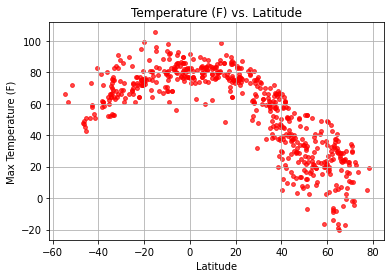

<Figure size 432x288 with 0 Axes>

In [25]:
# Scatter Plot: Temperature (F) vs. Latitude
plt.scatter(weather_df["Latitude"], weather_df["Max Temperature"], marker= "o", color= "r", alpha= 0.7, s= 15)
plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Images/weatherpy/scatter_temp_vs_lat.png")
plt.show()
plt.tight_layout()

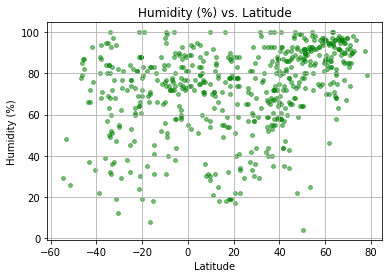

<Figure size 432x288 with 0 Axes>

In [26]:
# Scatter Plot: Humidity (%) vs. Latitude
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker= "o", color= "g", alpha= 0.5, s= 15)
plt.title("Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../Images/weatherpy/scatter_hum_vs_lat.png")
plt.show()
plt.tight_layout()

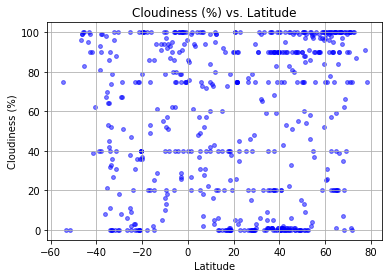

<Figure size 432x288 with 0 Axes>

In [27]:
# Scatter Plot: Cloudiness (%) vs. Latitude
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker= "o", color= "b", alpha= 0.5, s= 15)
plt.title("Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../Images/weatherpy/scatter_cloud_vs_lat.png")
plt.show()
plt.tight_layout()

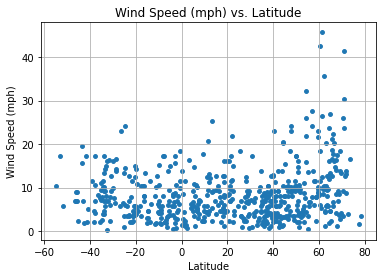

<Figure size 432x288 with 0 Axes>

In [28]:
# Scatter Plot: Wind Speed (mph) vs. Latitude
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker= "o", s= 15)
plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../Images/weatherpy/scatter_windspd_vs_lat.png")
plt.show()
plt.tight_layout()

## Run linear regression on each relationship
- Northern Hemisphere - Temperature (F) vs. Latitude
- Southern Hemisphere - Temperature (F) vs. Latitude
- Northern Hemisphere - Humidity (%) vs. Latitude
- Southern Hemisphere - Humidity (%) vs. Latitude
- Northern Hemisphere - Cloudiness (%) vs. Latitude
- Southern Hemisphere - Cloudiness (%) vs. Latitude
- Northern Hemisphere - Wind Speed (mph) vs. Latitude
- Southern Hemisphere - Wind Speed (mph) vs. Latitude


In [29]:
# Create DF for cities in north hemisphere and south hemisphere
nor_hem_df = weather_df.loc[weather_df["Latitude"] >= 0.0]
so_hem_df = weather_df.loc[weather_df["Latitude"] < 0.0]

In [30]:
# Create a function for correlation evaluation
def correlation_eva():
    if rvalue >= 0.8:
        print("It suggests a very strong positive correlation.")
    elif rvalue >= 0.6:
        print("It suggests a strong positive correlation")
    elif rvalue >= 0.4:
        print("It suggests a moderate positive correlation")
    elif rvalue >= 0.2:
        print("It suggests a weak positive correlation")
    elif rvalue >= 0:
        print("It suggests a very weak positive correlation")
    elif rvalue <= -0.8:
        print("It suggests a very strong negative correlation.")
    elif rvalue <= -0.6:
        print("It suggests a strong negative correlation")
    elif rvalue <= -0.4:
        print("It suggests a moderate negative correlation")
    elif rvalue <= -0.2:
        print("It suggests a weak negative correlation")
    elif rvalue < 0:
        print("It suggests a very weak negative correlation")

Regression line equation is: y = -1.17x + 92.95
The r-value is: -0.8595406780734755
It suggests a very strong negative correlation.
 


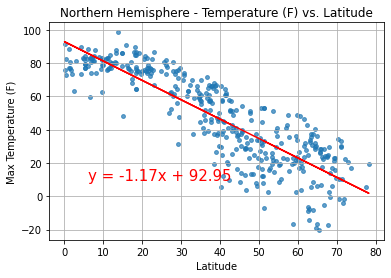

<Figure size 432x288 with 0 Axes>

In [31]:
# Run linear regression on each relationship
# Northern Hemisphere - Temperature (F) vs. Latitude
x = pd.to_numeric(nor_hem_df["Latitude"]).astype(float)
y = pd.to_numeric(nor_hem_df["Max Temperature"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"Regression line equation is: {line_eq}")

plt.scatter(x, y, marker= "o", s= 15, alpha= 0.7)
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq, (6,10), fontsize= 15, color= "red")

plt.title("Northern Hemisphere - Temperature (F) vs. Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

print(f"The r-value is: {rvalue}")
correlation_eva()
print(" ")

plt.savefig("../Images/weatherpy/reg_nor_temp_vs_lat.png")
plt.show()
plt.tight_layout()

Regression line equation is: y = 0.53x + 85.0
The r-value is: 0.6214115019835539
It suggests a strong positive correlation
 


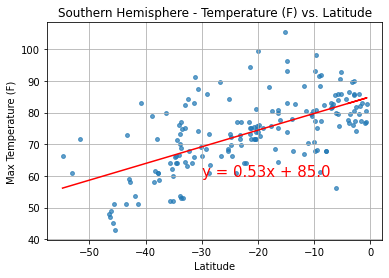

<Figure size 432x288 with 0 Axes>

In [32]:
# Run linear regression on each relationship
# Southern Hemisphere - Temperature (F) vs. Latitude
x = pd.to_numeric(so_hem_df["Latitude"]).astype(float)
y = pd.to_numeric(so_hem_df["Max Temperature"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"Regression line equation is: {line_eq}")

plt.scatter(x, y, marker= "o", s= 15, alpha= 0.7)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (-30, 60), fontsize= 15, color= "red")

plt.title("Southern Hemisphere - Temperature (F) vs. Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

print(f"The r-value is: {rvalue}")
correlation_eva()
print(" ")

plt.savefig("../Images/weatherpy/reg_sou_temp_vs_lat.png")
plt.show()
plt.tight_layout()

Regression line equation is: y = 0.4x + 58.92
The r-value is: 0.39908479769542116
It suggests a weak positive correlation
 


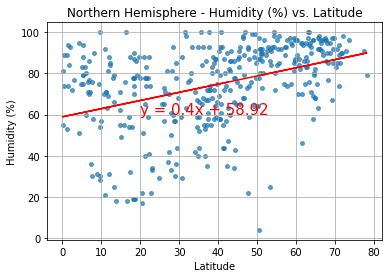

<Figure size 432x288 with 0 Axes>

In [33]:
# Run linear regression on each relationship
# Northern Hemisphere - Humidity (%) vs. Latitude
x = pd.to_numeric(nor_hem_df["Latitude"]).astype(float)
y = pd.to_numeric(nor_hem_df["Humidity"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"Regression line equation is: {line_eq}")

plt.scatter(x, y, marker= "o", s= 15, alpha= 0.7)
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq, (20, 60), fontsize= 15, color= "red")

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

print(f"The r-value is: {rvalue}")
correlation_eva()
print(" ")

plt.savefig("../Images/weatherpy/reg_nor_hum_vs_lat.png")
plt.show()
plt.tight_layout()

Regression line equation is: y = 0.23x + 73.04
The r-value is: 0.15408218373417368
It suggests a very weak positive correlation
 


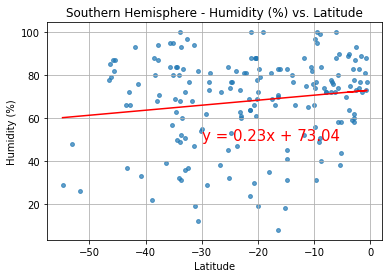

<Figure size 432x288 with 0 Axes>

In [34]:
# Run linear regression on each relationship
# Southern Hemisphere - Humidity (%) vs. Latitude
x = pd.to_numeric(so_hem_df["Latitude"]).astype(float)
y = pd.to_numeric(so_hem_df["Humidity"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"Regression line equation is: {line_eq}")

plt.scatter(x, y, marker= "o", s= 15, alpha= 0.7)
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq, (-30, 50), fontsize= 15, color= "red")

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

print(f"The r-value is: {rvalue}")
correlation_eva()
print(" ")

plt.savefig("../Images/weatherpy/reg_sou_hum_vs_lat.png")
plt.show()
plt.tight_layout()

Regression line equation is: y = 0.45x + 36.78
The r-value is: 0.2282205276039616
It suggests a weak positive correlation
 


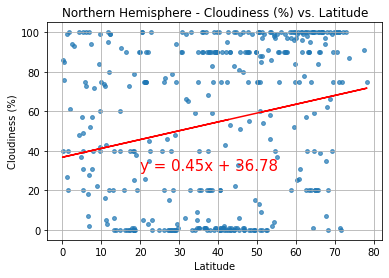

<Figure size 432x288 with 0 Axes>

In [35]:
# Run linear regression on each relationship
# Northern Hemisphere - Cloudiness (%) vs. Latitude
x = pd.to_numeric(nor_hem_df["Latitude"]).astype(float)
y = pd.to_numeric(nor_hem_df["Cloudiness"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"Regression line equation is: {line_eq}")

plt.scatter(x, y, marker= "o", s= 15, alpha= 0.7)
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq, (20, 30), fontsize= 15, color= "red")

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

print(f"The r-value is: {rvalue}")
correlation_eva()
print(" ")

plt.savefig("../Images/weatherpy/reg_nor_cloud_vs_lat.png")
plt.show()
plt.tight_layout()

Regression line equation is: y = 0.35x + 64.53
The r-value is: 0.13196397003824384
It suggests a very weak positive correlation
 


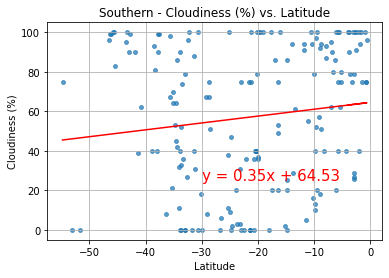

<Figure size 432x288 with 0 Axes>

In [36]:
# Run linear regression on each relationship
# Southern Hemisphere - Cloudiness (%) vs. Latitude
x = pd.to_numeric(so_hem_df["Latitude"]).astype(float)
y = pd.to_numeric(so_hem_df["Cloudiness"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"Regression line equation is: {line_eq}")

plt.scatter(x, y, marker= "o", s= 15, alpha= 0.7)
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq, (-30, 25), fontsize= 15, color= "red")

plt.title("Southern - Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

print(f"The r-value is: {rvalue}")
correlation_eva()
print(" ")

plt.savefig("../Images/weatherpy/reg_sou_cloud_vs_lat.png")
plt.show()
plt.tight_layout()

Regression line equation is: y = 0.1x + 5.03
The r-value is: 0.2844933705630663
It suggests a weak positive correlation
 


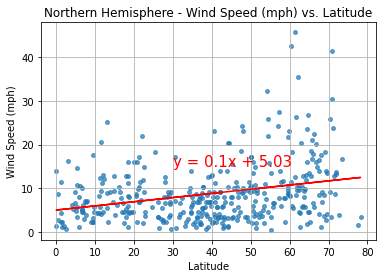

<Figure size 432x288 with 0 Axes>

In [37]:
# Run linear regression on each relationship
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
x = pd.to_numeric(nor_hem_df["Latitude"]).astype(float)
y = pd.to_numeric(nor_hem_df["Wind Speed"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"Regression line equation is: {line_eq}")

plt.scatter(x, y, marker= "o", s= 15, alpha= 0.7)
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq, (30, 15), fontsize= 15, color= "red")

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

print(f"The r-value is: {rvalue}")
correlation_eva()
print(" ")

plt.savefig("../Images/weatherpy/reg_nor_windspd_vs_lat.png")
plt.show()
plt.tight_layout()

Regression line equation is: y = -0.06x + 6.33
The r-value is: -0.18013503803587197
It suggests a very weak negative correlation
 


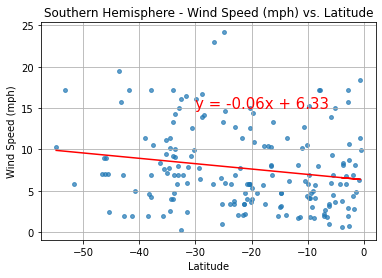

<Figure size 432x288 with 0 Axes>

In [38]:
# Run linear regression on each relationship
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
x = pd.to_numeric(so_hem_df["Latitude"]).astype(float)
y = pd.to_numeric(so_hem_df["Wind Speed"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"Regression line equation is: {line_eq}")

plt.scatter(x, y, marker= "o", s= 15, alpha= 0.7)
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq, (-30, 15), fontsize= 15, color= "red")

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

print(f"The r-value is: {rvalue}")
correlation_eva()
print(" ")

plt.savefig("../Images/weatherpy/reg_sou_windspd_vs_lat.png")
plt.show()
plt.tight_layout()

After running a few different sets of coordinates, I obseved some strong correlation between latitude vs. temperatures.  
Which suggests that it gets hotter as you get closer to the equator no matter in north or south hemisphere.  
All other relationships have shown weak correlations (moderate at best).